In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
df = pd.read_csv('global_gaming_esports_2010_2025.csv')
df.head()

,Year,Country,Region,Gaming_Revenue_BillionUSD,Esports_Revenue_MillionUSD,Active_Players_Million,Esports_Viewers_Million,Avg_Spending_USD,Top_Genre,Top_Platform,...,Pro_Players_Count,Internet_Penetration_Percent,Avg_Latency_ms,AR_VR_Adoption_Index,Streaming_Influence_Index,Covid_Impact_Index,Female_Gamer_Percent,Mobile_Gaming_Share,Esports_PrizePool_MillionUSD,Gaming_Companies_Count
0,2010,United States,North America,6.24,409.6,11.0,17.9,133.9,Strategy,Mobile,...,15912,82.5,95.4,0.13,0.10,0.0,13.0,20.0,34.0,395
1,2011,United States,North America,7.74,622.7,32.4,76.7,64.9,Sports,Console,...,13797,70.5,83.9,0.08,0.16,0.0,10.7,23.0,10.2,60
2,2012,United States,North America,9.60,928.3,51.9,148.4,84.1,MOBA,Mobile,...,3982,63.7,32.3,0.11,0.22,0.0,13.3,26.0,8.5,349
3,2013,United States,North America,11.91,1321.8,50.3,92.9,76.9,MOBA,Mobile,...,8262,51.4,88.2,0.14,0.28,0.0,12.8,29.0,18.3,53
4,2014,United States,North America,14.77,869.1,13.4,21.3,69.0,Strategy,Mobile,...,24024,93.4,70.5,0.14,0.34,0.0,17.0,32.0,18.3,50


## Yearly Analysis

<Figure size 1200x600 with 0 Axes>

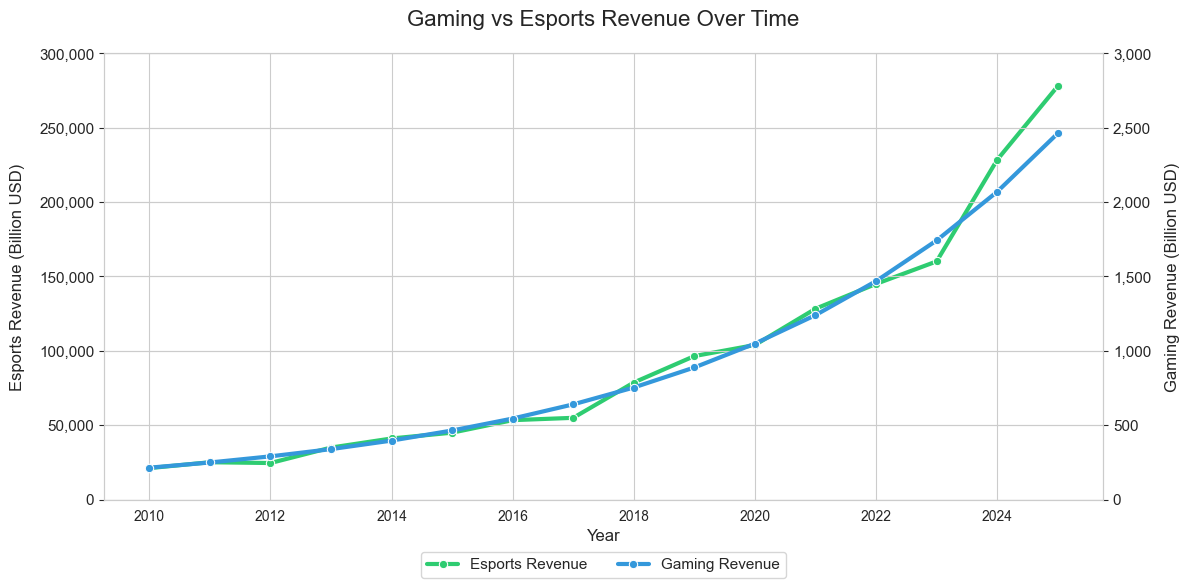

In [34]:
df_yearly = df.groupby(['Year']).agg({'Gaming_Revenue_BillionUSD':'sum', 'Esports_Revenue_MillionUSD':'sum'}).reset_index()
df_yearly.columns = ['Year', 'Gaming_Revenue', 'Esports_Revenue']
df_yearly.set_index('Year', inplace=True)


sns.set_style("whitegrid")
plt.figure(figsize=(12,6))


fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(
    data=df_yearly['Esports_Revenue'], 
    color="#2ecc71", linewidth=3, marker="o", ax=ax1, label="Esports Revenue", legend=False
)

ax1.set_ylabel("Esports Revenue (Billion USD)", fontsize=12, labelpad=10)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
ax1.tick_params(axis='y', labelsize=11)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylim(0, 300000)

ax2 = ax1.twinx()

sns.lineplot(
    data=df_yearly['Gaming_Revenue'], 
    color="#3498db", linewidth=3, marker="o", ax=ax2, label="Gaming Revenue", legend=False
)

ax2.set_ylabel("Gaming Revenue (Billion USD)", fontsize=12, labelpad=10)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
ax2.tick_params(axis='y', labelsize=11)
ax2.set_ylim(0, 3000)

plt.title("Gaming vs Esports Revenue Over Time", fontsize=16, pad=20)

lns = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lns]
ax1.legend(
    lns, labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),   # below plot
    ncol=2,
    fontsize=11
)

plt.tight_layout()
plt.show()

## Compound annual growth rate

In [45]:
years = df_yearly.index
n_years = years[-1] - years[0]

cagr = (df_yearly.iloc[-1] / df_yearly.iloc[0]) ** (1 / n_years) - 1
cagr.apply(lambda x: f"{x:.2%}")

Gaming_Revenue     17.68%
Esports_Revenue    18.74%
dtype: object

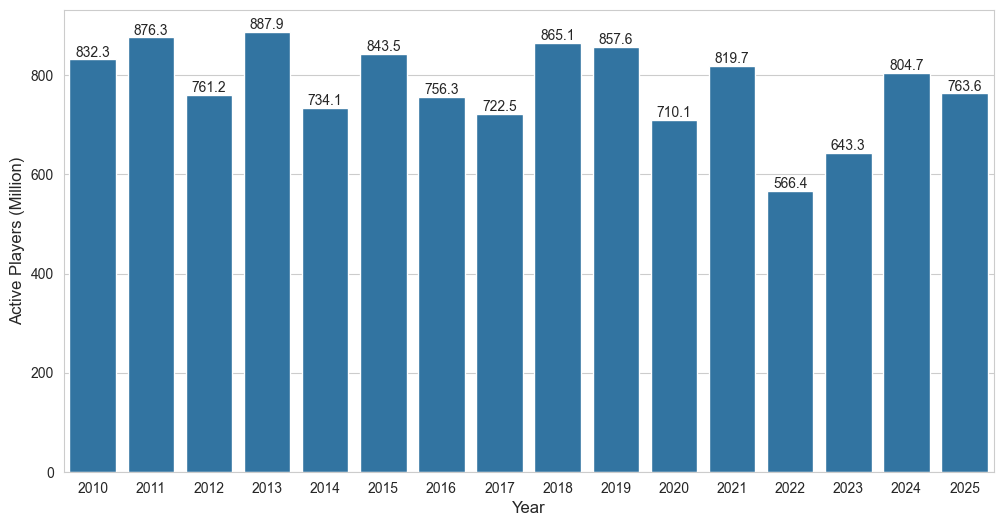

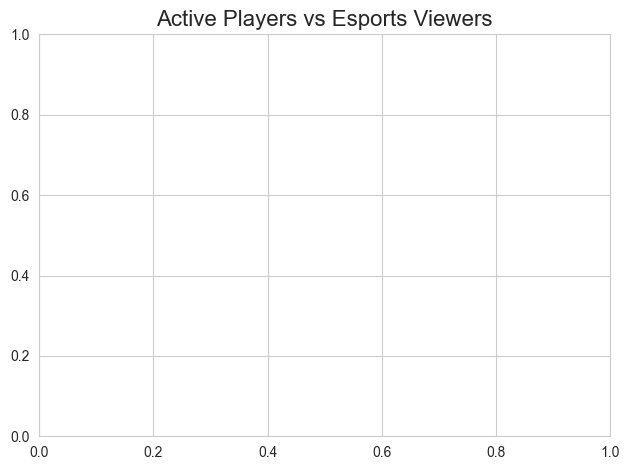

In [84]:
df_yearly_active_players = df.groupby(['Year']).agg({'Active_Players_Million':'sum', 'Esports_Viewers_Million':'sum'})
fig, ax1 = plt.subplots(figsize=(12,6))


sns.barplot(data=df_yearly_active_players['Active_Players_Million'], ax=ax1)
ax1.set_ylabel("Active Players (Million)")
ax1.set_ylabel("Active Players (Million)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)

for container in ax1.containers:
    ax1.bar_label(container)

plt.show()

ax2 = ax1.twinx()

sns.barplot(
    data=df_yearly_active_players,
    x="Year", y="Esports_Viewers_Million",
    color="#2ecc71",
    alpha=0.5,
    ax=ax2
)

ax2.set_ylabel("Esports Viewers (Million)", fontsize=12)

plt.title("Active Players vs Esports Viewers", fontsize=16)
plt.tight_layout()
plt.show()

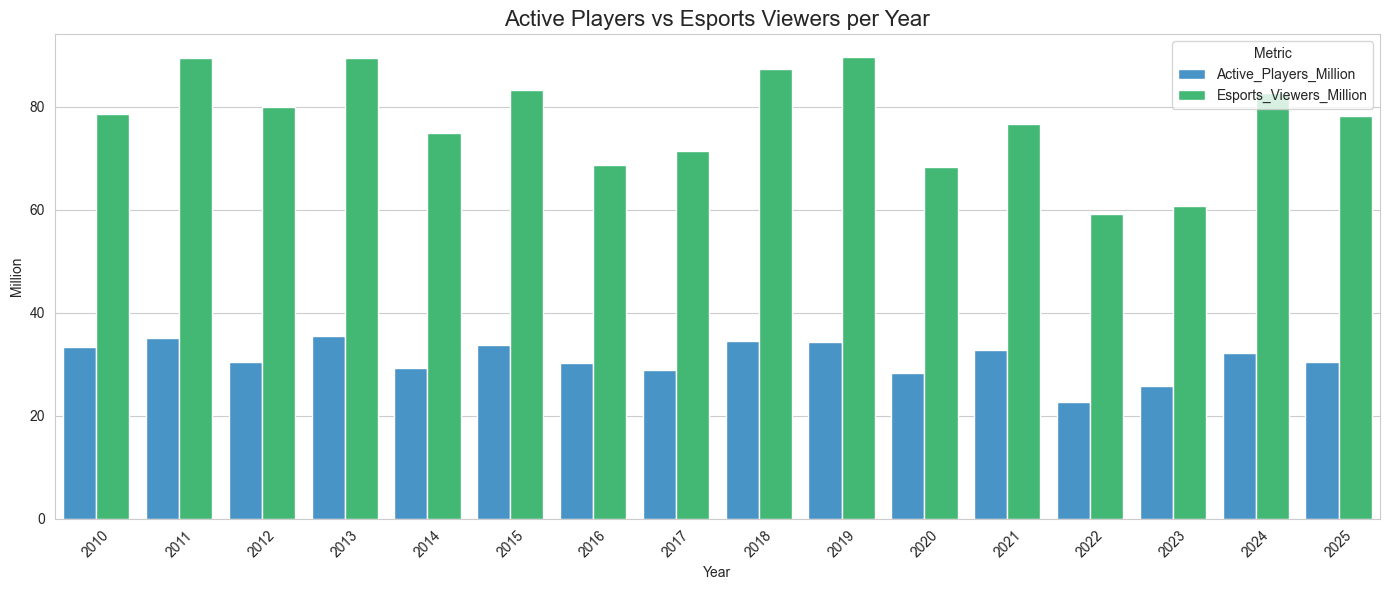

In [ ]:
df_melt = df.melt(id_vars="Year", 
                  value_vars=["Active_Players_Million", "Esports_Viewers_Million"],
                  var_name="Metric", value_name="Count")

# Plot
plt.figure(figsize=(14,6))
sns.barplot(data=df_melt, x="Year", y="Count", hue="Metric", palette=["#3498db", "#2ecc71"], errorbar=None)

plt.ylabel("Million")
plt.xlabel("Year")
plt.title("Active Players vs Esports Viewers per Year", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [92]:
df_melt

,Year,Metric,Count
0,2010,Active_Players_Million,11.0
1,2011,Active_Players_Million,32.4
2,2012,Active_Players_Million,51.9
3,2013,Active_Players_Million,50.3
4,2014,Active_Players_Million,13.4
...,...,...,...
795,2021,Esports_Viewers_Million,113.6
796,2022,Esports_Viewers_Million,23.6
797,2023,Esports_Viewers_Million,20.0
798,2024,Esports_Viewers_Million,151.1
